# Kshs-USD Exchange Time Series Forecast

## 1. Import Necessary Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
from tensorflow.keras import layers

## 2. Load Data

In [22]:
# Load the csv file
exchange_data = pd.read_csv('CBK_Indicative_Exchange_Rates.csv')

In [23]:
# Get the first 5 rows of the dataset
exchange_data.head()

,Date,Currency,Mean,Buy,Sell
0,9/12/2003,US DOLLAR,84.1483,84.0539,84.2428
1,9/12/2004,US DOLLAR,84.3208,84.2250,84.4167
2,9/12/2004,US DOLLAR,84.3208,84.2250,84.4167
3,11/2/2004,US DOLLAR,81.2078,81.1078,81.3078
4,11/3/2004,US DOLLAR,81.2117,81.1144,81.3089


In [24]:
# Checking the information of the dataset
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4812 non-null   object 
 1   Currency  4812 non-null   object 
 2   Mean      4812 non-null   float64
 3   Buy       4812 non-null   float64
 4   Sell      4812 non-null   float64
dtypes: float64(3), object(2)
memory usage: 188.1+ KB


In [25]:
exchange_data.drop(columns='Currency', inplace=True)

## 3. Data Cleaning

### 3.1 Splitting the date column to day, month and year

In [26]:
# Splitting the Date Column using split() function
exchange_data[['Day', 'Month', 'Year']] = exchange_data['Date'].str.split('/', expand=True)

# Inserting the new columns at the desired positions
exchange_data = exchange_data[['Day', 'Month', 'Year'] + [col for col in exchange_data.columns if col not in ['Day', 'Month', 'Year']]]

In [27]:
exchange_data.columns

Index(['Day', 'Month', 'Year', 'Date', 'Mean', 'Buy', 'Sell'], dtype='object')

## 4. Time Series Analysis

### 4.1 Mean Distribution

<Axes: xlabel='Mean'>

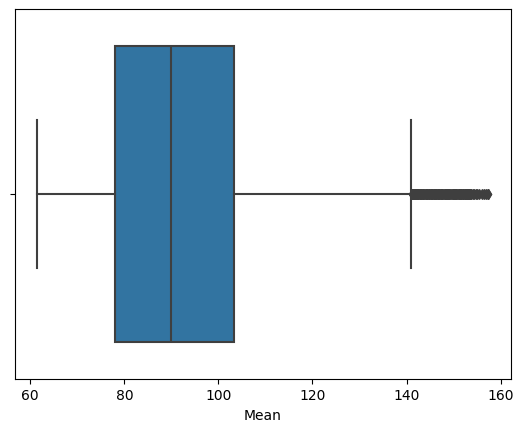

In [28]:
sns.boxplot(data=exchange_data, x='Mean', orient='h')

From the box plot, it is clear that there are outliers all the way to 160 in the mean column. The median is 90 while maximum and minimum are 140 and 60 respectively.

### 4.2 Exchange Rate per Date

In [29]:

# Create an interactive line plot with Plotly
fig = px.line(exchange_data, x='Date', y='Mean', labels={'Mean': 'Mean Exchange Rate'})
fig.update_traces(mode='lines+markers', hovertemplate=None)
fig.update_layout(hovermode='x unified',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
                  title='Mean Exchange Rate(USD/KSH) Over Time',
                  xaxis_title='Date',
                  yaxis_title='Mean Exchange Rate',
                  xaxis=dict(showgrid=False))  # Hide date markers on the x-axis
fig.show()


After Kenya's 2007-2008 PEV, the Kshs drastically weakened over the dollar. 

### 4.3 Exchange Rate per Year

In [30]:
# Create an interactive line plot with Plotly
fig = px.line(exchange_data, x='Year', y='Mean', labels={'Mean': 'Mean Exchange Rate'})
fig.update_traces(mode='lines', hovertemplate=None)
fig.update_layout(hovermode='x unified',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
                  title='Mean Exchange Rate(USD/KSH) Over the Years',
                  xaxis_title='Date',
                  yaxis_title='Mean Exchange Rate',
                  xaxis=dict(showgrid=False))  # Hide date markers on the x-axis
fig.show()

## 5. Time Series Forecasting

### 5.1 Split the Dataset

In [34]:
from sklearn.model_selection import train_test_split

X = exchange_data[['Date', 'Buy', 'Sell']]
y= exchange_data['Mean']

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

### 5.1 Feature Engineering

### Data Normalization